Digital Signal Processing

Assignment #02

Group Members:

1. Navami Kairanda (Enrollment Number:2577665)
1. Pankhuri Vanjani (Enrollment Number:7009617)

In [1]:
#1.1

import numpy as np
import pdb
import math

def imgmirror(M, h):
    n, m = M.shape
    w = math.floor(h/2)
    O = np.zeros((n+2*w, m+2*w))
    O[w:-w,w:-w] = M
    O[w:-w,:w] = M[:,w-1::-1] 
    O[w:-w,-w:] = M[:,:-w-1:-1] 
    O[:w,w:-w] = M[w-1::-1,:] 
    O[-w:,w:-w] = M[:-w-1:-1,:] 
    return O

# Test imgmirror function
M = np.array([[1, 2], [3, 4]]) 
h = 5
O = imgmirror(M, h) 



Image must be mirrored by floor(h/2) on al four edges

In [2]:
# 1.2
def gaussfilter(I1, K):
    h, _ = K.shape
    n, m = I1.shape
   
    I2 = np.empty(I1.shape)
    I1 = imgmirror(I1, h)
    for x in range(n):
        for y in range(m):
            I2[x,y] = (I1[x:x+h, y:y+h] * K).sum() 
    return I2


Running time is quadratic ie. O(n^2) where n is the size of input image

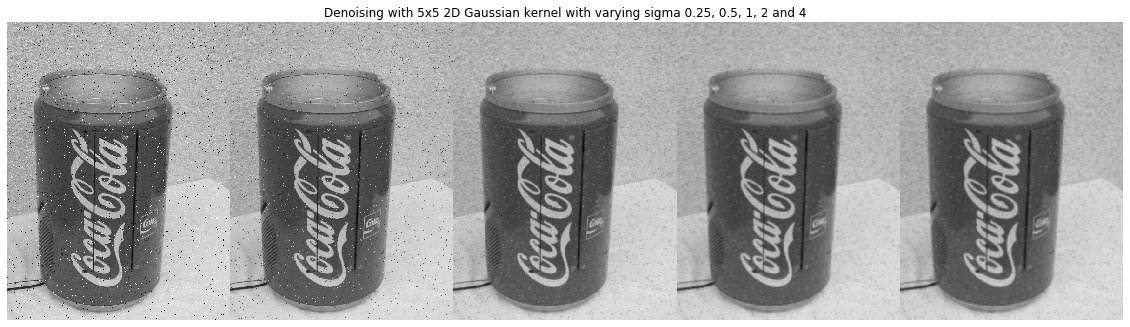

In [3]:
# 1.3
from matplotlib import pyplot as plt

def gausskern2D(sigma):
    ax = np.linspace(-2., 2., 5) 
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sigma))
    return kernel / np.sum(kernel) # kernel length - 5x5

I1 = plt.imread('noisycoke.jpg')

sigmas = [0.25, 0.5, 1, 2, 4]
denoised_imgs = []
for sig in sigmas:
    K = gausskern2D(sig)
    I2 = gaussfilter(I1, K)
    denoised_imgs.append(I2)
denoised_imgs = np.hstack(denoised_imgs)

plt.figure(figsize=(20,8))
plt.axis('off')
plt.title('Denoising with 5x5 2D Gaussian kernel with varying sigma 0.25, 0.5, 1, 2 and 4')
plt.imshow(denoised_imgs, cmap='gray')
plt.savefig('denoisedcoke.png')


As we increase the sigma, the denoising is more effective and image gets blurrier.  This is because higher the sigma, larger is the gaussian blur radius. 

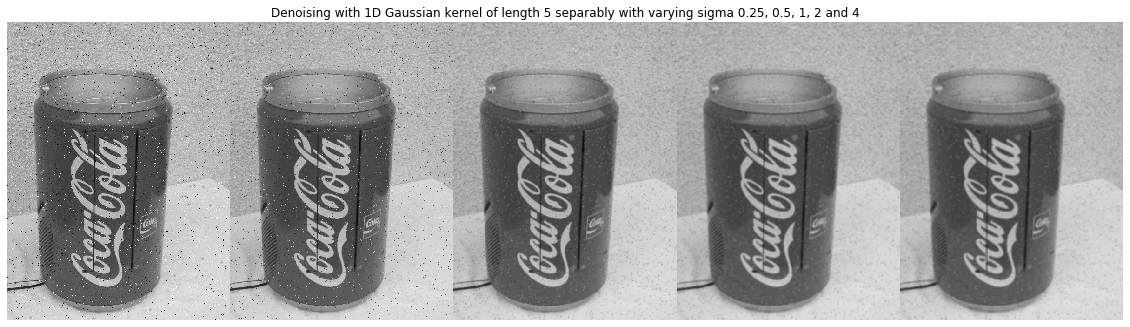

In [4]:

# 1.4
def gaussfilter_sep(I1, K):
    n, m = I1.shape
    h = K.size
    I1 = imgmirror(I1, h)

    gausX = np.zeros((n+h-1, m))
    for i, v in enumerate(K):
        gausX += v * I1[:, i:m+i]
    gausY = np.zeros((n, m))
    for i, v in enumerate(K):
        gausY += v * gausX[i:n+i]
    return gausY

def gausskern1D(sigma):
    ax = np.linspace(-2., 2., 5) 
    kernel = np.exp(-0.5 * np.square(ax) / np.square(sigma)) # kernel length - 5
    return kernel / np.sum(kernel)

sigmas = [0.25, 0.5, 1, 2, 4]
denoised_imgs_sep = []

for sig in sigmas:
    K = gausskern1D(sig)
    I2 = gaussfilter_sep(I1, K)
    denoised_imgs_sep.append(I2)

denoised_imgs_sep = np.hstack(denoised_imgs_sep)
#print(np.linalg.norm(denoised_imgs-denoised_imgs_sep))

plt.figure(figsize=(20,8))
plt.axis('off')
plt.title('Denoising with 1D Gaussian kernel of length 5 separably with varying sigma 0.25, 0.5, 1, 2 and 4')
plt.imshow(denoised_imgs_sep, cmap='gray')
plt.savefig('denoisedcoke_sep.png')


This separable version is linear complexity ie. O(n). Hence, it is faster 

2. Convolution 

In [5]:
%%html
<img src = "2.1.png",width=900, height=900>

In [6]:
%%html
<img src = "2.2.png",width=900, height=900>

In [7]:
%%html
<img src = "2.3.png",width=900, height=900>

3. Derivative filter 

In [8]:
%%html
<img src = "3a.png",width=900, height=900>

In [9]:
%%html
<img src = "3b.png",width=350, height=350>